#### Выпускная работа по курсу "Машинное обучение"

*Работа выполнена слушателем курса "Машинное обучение" (DS-12(2MO-13)) Кудрявцевой И.А.*

В качестве задачи рассматривается задача классификации на примере датасета, позаимствованного на ресурсе [kaggle](https://www.kaggle.com/datasets/uom190346a/sleep-health-and-lifestyle-dataset)

Согласно описанию, представленному на сайте, датасет содержит 12 признаков, характеризующих физическое состояние человека, его возраст, пол и другое. Предлагается решить задачу классификации, призванную спрогнозировать, есть ли у пациента проблемы со сном или нет. Можно вначале упростить и рассмотреть бинарную классификацию (есть или нет). В действительном датасете выделяют три случая, когда проблем совсем нет, когда есть бессоница и когда возможна внезапная остановка дыхания во сне.

Последний столбец в представленном ниже датасете можно рассматривать в качестве целевого (target)

In [120]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [121]:
data_raw = pd.read_csv(
    r"C:\Users\Irina\Desktop\Machine Learning HSE\vkr\archive\Sleep_health_and_lifestyle_dataset.csv",keep_default_na=False, na_values=['NaN'])

In [122]:
data_raw.head(20)

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
5,6,Male,28,Software Engineer,5.9,4,30,8,Obese,140/90,85,3000,Insomnia
6,7,Male,29,Teacher,6.3,6,40,7,Obese,140/90,82,3500,Insomnia
7,8,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,None
8,9,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,None
9,10,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,None


In [123]:
data_raw.shape

(374, 13)

In [124]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           374 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


In [125]:
display(data_raw.isnull().sum())

Person ID                  0
Gender                     0
Age                        0
Occupation                 0
Sleep Duration             0
Quality of Sleep           0
Physical Activity Level    0
Stress Level               0
BMI Category               0
Blood Pressure             0
Heart Rate                 0
Daily Steps                0
Sleep Disorder             0
dtype: int64

Пропущенных значений нет

**Проанализируем данные**

Сопоставим каждому вхождению None в целевом стобце исходной таблицы 1, остальным значениям - 0

In [126]:
un_val=data_raw["Sleep Disorder"].unique()
un_val

array(['None', 'Sleep Apnea', 'Insomnia'], dtype=object)

In [127]:
def repl(x,un_val):
    for i,val in enumerate(un_val):
        if x == val:
            return i

In [133]:
target_original=data_raw["Sleep Disorder"].apply(lambda x: repl(x,un_val))
target_original

0      0
1      0
2      0
3      1
4      1
      ..
369    1
370    1
371    1
372    1
373    1
Name: Sleep Disorder, Length: 374, dtype: int64

In [43]:
data_raw["Sleep Disorder"]=data_raw["Sleep Disorder"].apply(lambda x: 1 if x == 'None' else 0)

In [ ]:
import warnings
warnings.filterwarnings("ignore")

Визуализируем распределение 

C:\Users\Irina\AppData\Local\Temp\ipykernel_3772\3433987589.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_raw["Sleep Disorder"], hist=True, kde=False,


Text(0, 0.5, 'amount of samples in each class')

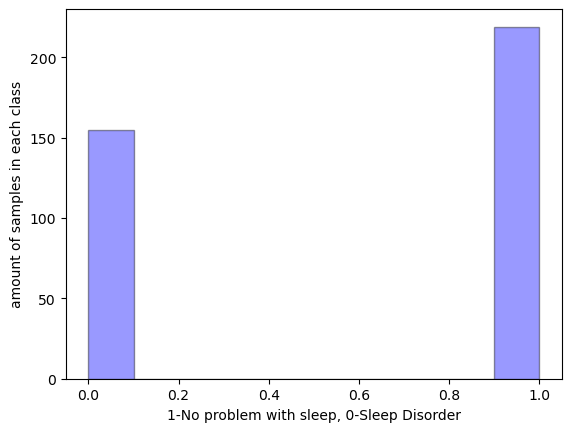

In [44]:
import seaborn as sns

sns.distplot(data_raw["Sleep Disorder"], hist=True, kde=False, 
             bins=10, color = 'blue',
             hist_kws={'edgecolor':'black'})


plt.xlabel('1-No problem with sleep, 0-Sleep Disorder')
plt.ylabel('amount of samples in each class')

In [45]:
 data_raw["Sleep Disorder"].value_counts()

Sleep Disorder
1    219
0    155
Name: count, dtype: int64

Отмечаем вполне хорошую сбалансированность по классам

In [46]:
data_for_restore=data_raw.copy()

In [47]:
data=data_raw.drop(columns='Person ID')

In [48]:
num_cols=data.select_dtypes(include=['float64','int64']).columns[:-1]
num_cols

Index(['Age', 'Sleep Duration', 'Quality of Sleep', 'Physical Activity Level',
       'Stress Level', 'Heart Rate', 'Daily Steps'],
      dtype='object')

C:\Users\Irina\AppData\Local\Temp\ipykernel_3772\1926647334.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[cols],kde=False, bins=7, color = 'blue',


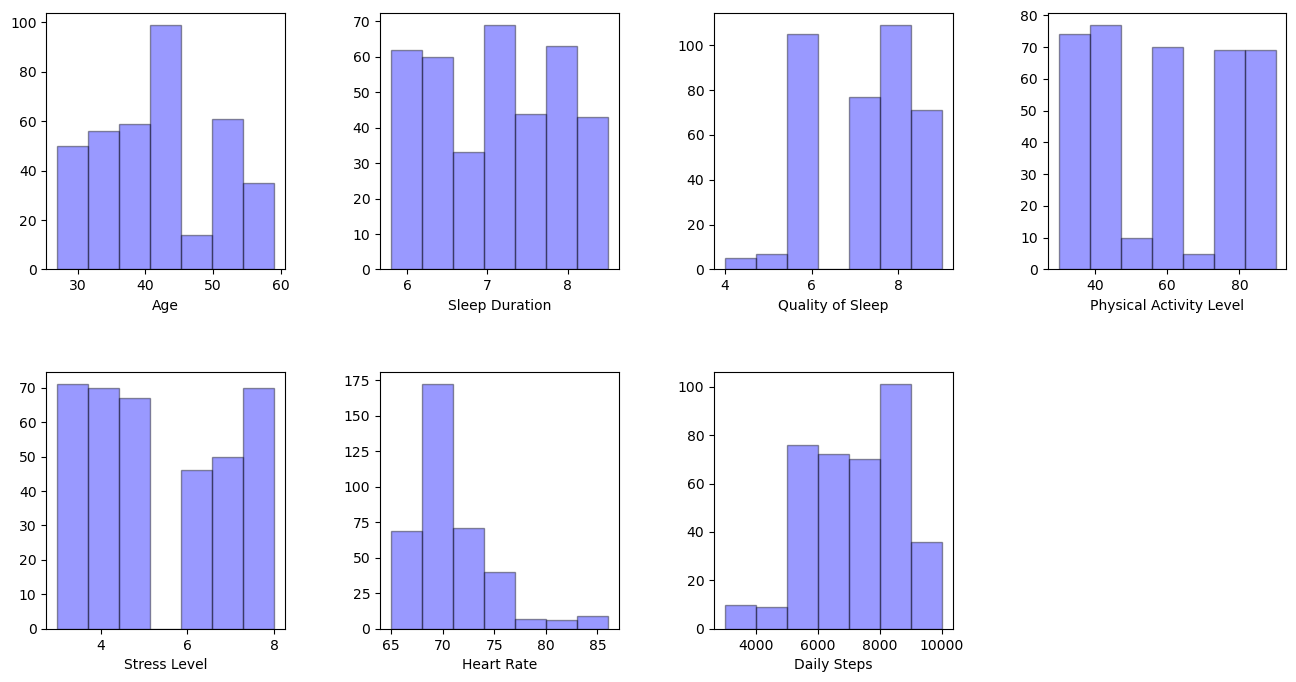

In [49]:
fig=plt.figure(figsize=(16,8))
fig.subplots_adjust(hspace=0.4,wspace=0.4)
for i,cols in enumerate(num_cols):
    fig.add_subplot(2,int(len(num_cols)/2)+(len(num_cols)%2),i+1)
    sns.distplot(data[cols],kde=False, bins=7, color = 'blue',
             hist_kws={'edgecolor':'black'})

In [50]:
#from sklearn.model_selection import train_test_split


#data_for_train,data_for_test = train_test_split(data, test_size=0.3, random_state=42)

In [51]:
#data_for_train.head()

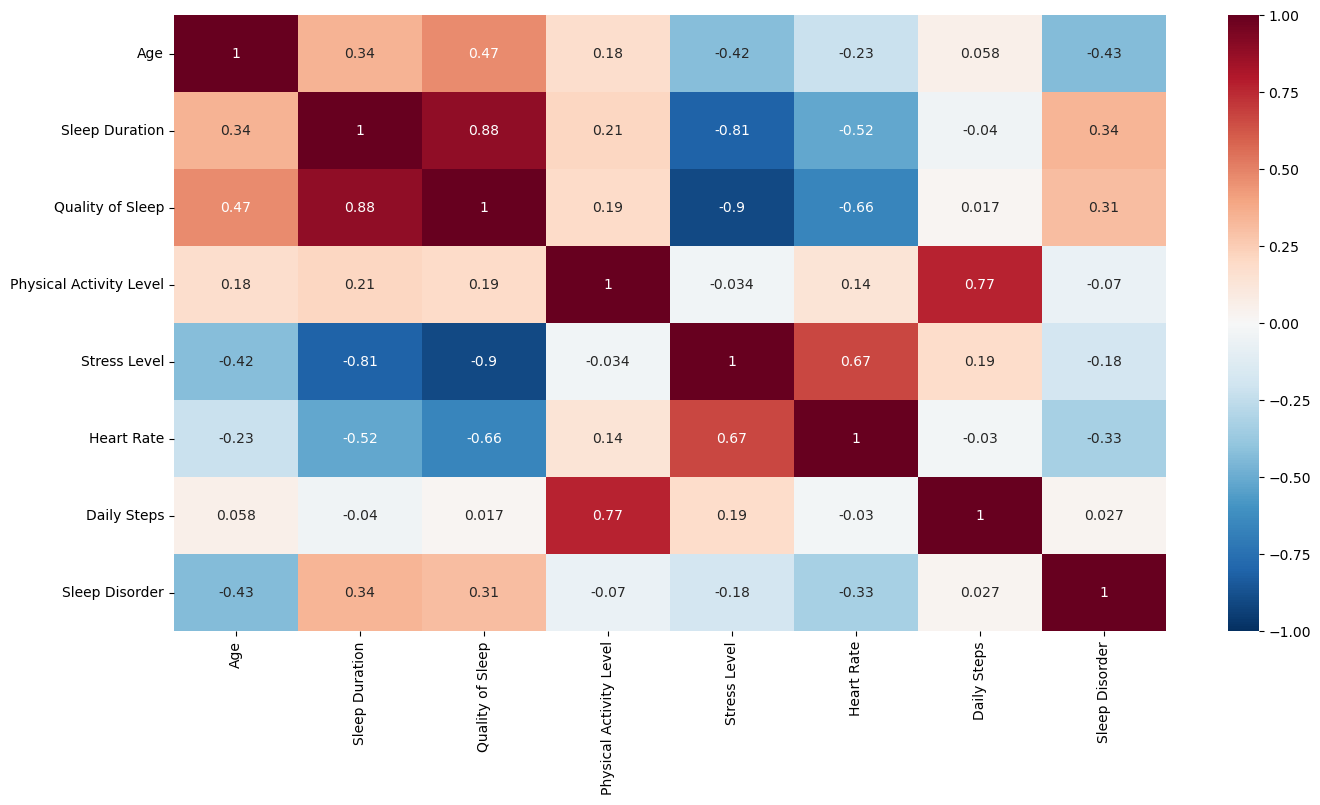

In [55]:
plt.figure(figsize=(16,8))
sns.heatmap(
    data.corr(numeric_only = True),        
    cmap='RdBu_r', 
    annot=True, 
    vmin=-1, vmax=1);

C:\Users\Irina\anaconda31\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


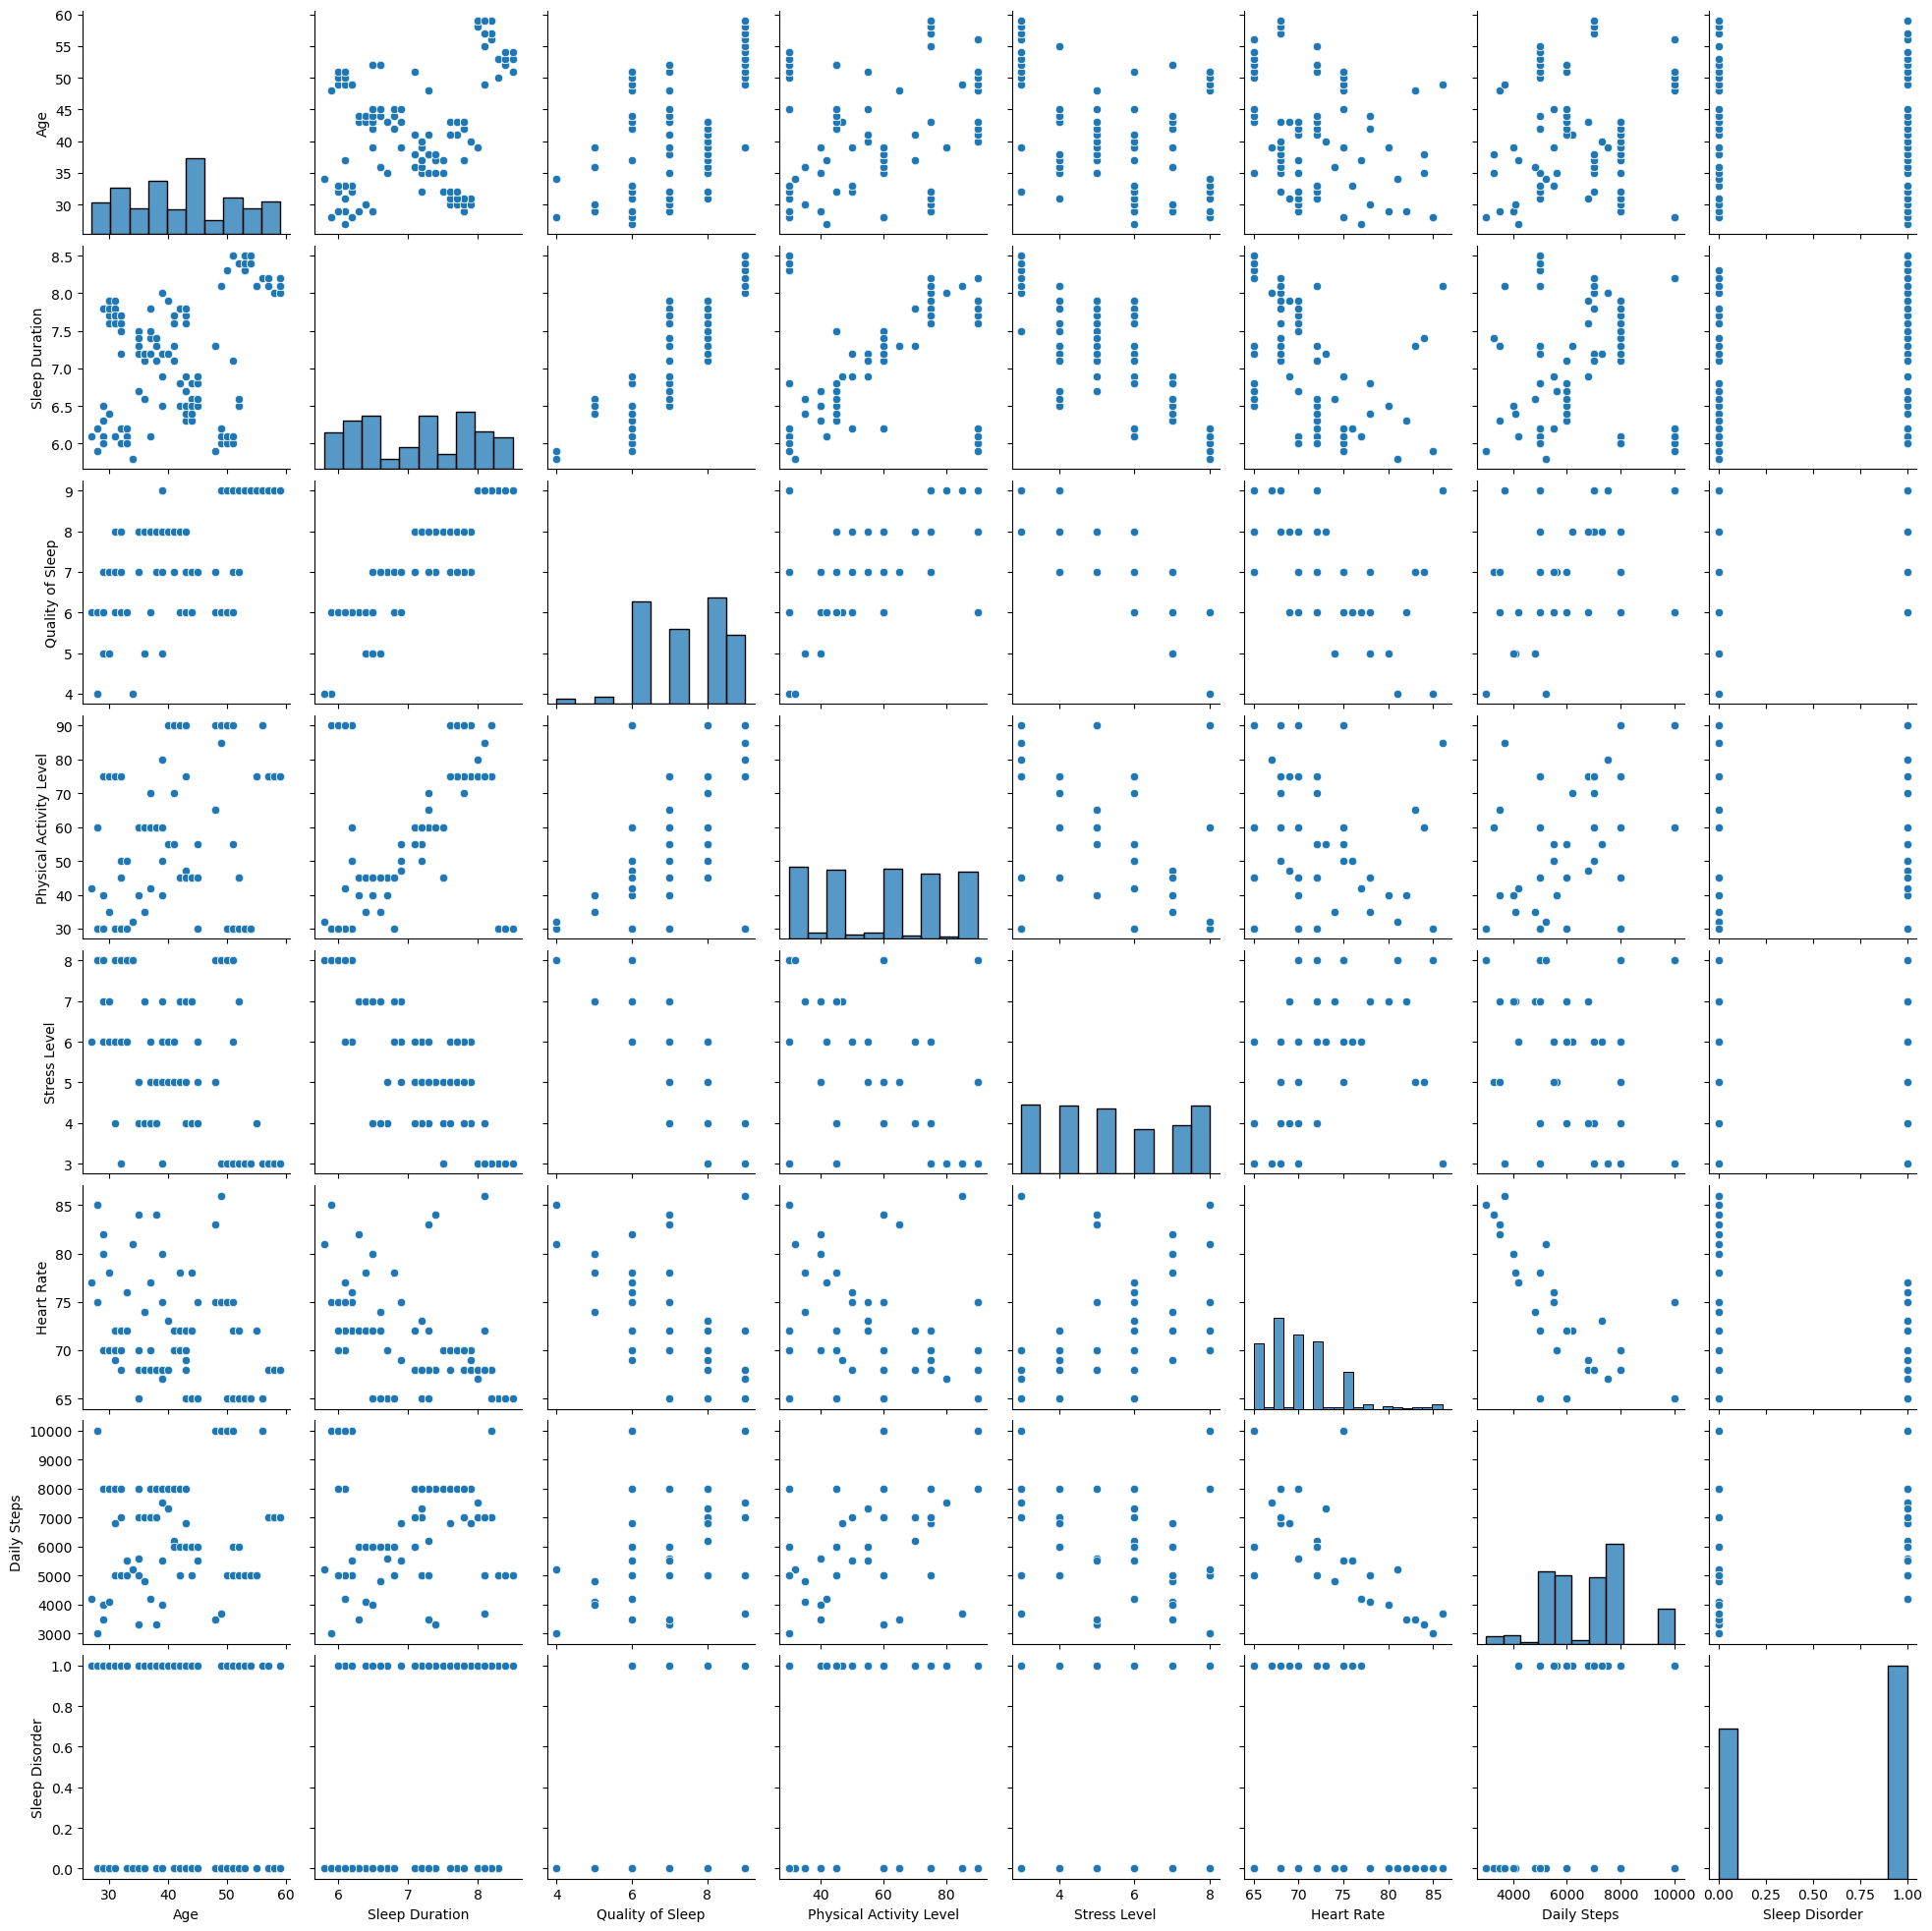

In [53]:
sns.pairplot(data);

In [18]:
###df=pd.pivot_table(data_raw,index=['Gender','Sleep Disorder'],aggfunc={'Age':np.mean,'Sleep Disorder':np.sum})

In [56]:
data_for_restore=data.copy()

In [57]:
num_cols=data.select_dtypes(include=['float64','int64']).columns[:-1]
num_cols

Index(['Age', 'Sleep Duration', 'Quality of Sleep', 'Physical Activity Level',
       'Stress Level', 'Heart Rate', 'Daily Steps'],
      dtype='object')

C:\Users\Irina\AppData\Local\Temp\ipykernel_3772\4232975321.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[cols],kde=False, bins=6, color = 'blue',


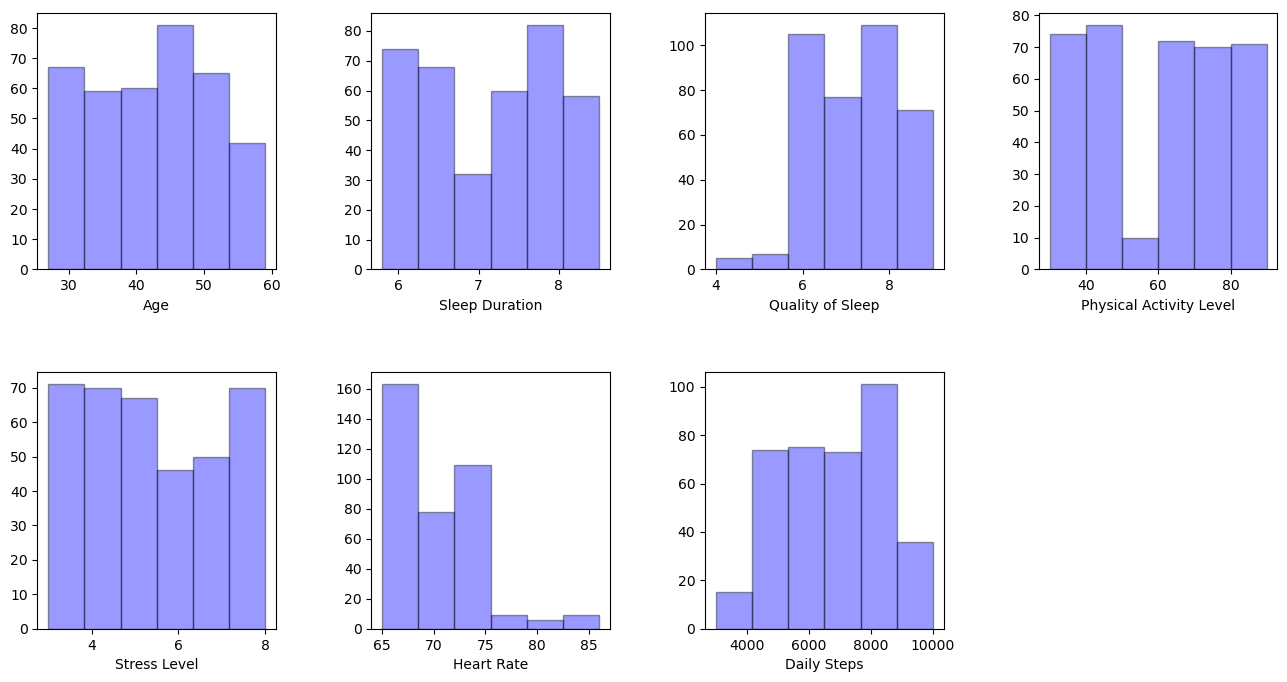

In [58]:
fig=plt.figure(figsize=(16,8))
fig.subplots_adjust(hspace=0.4,wspace=0.4)
for i,cols in enumerate(num_cols):
    fig.add_subplot(2,int(len(num_cols)/2)+(len(num_cols)%2),i+1)
    sns.distplot(data[cols],kde=False, bins=6, color = 'blue',
             hist_kws={'edgecolor':'black'})

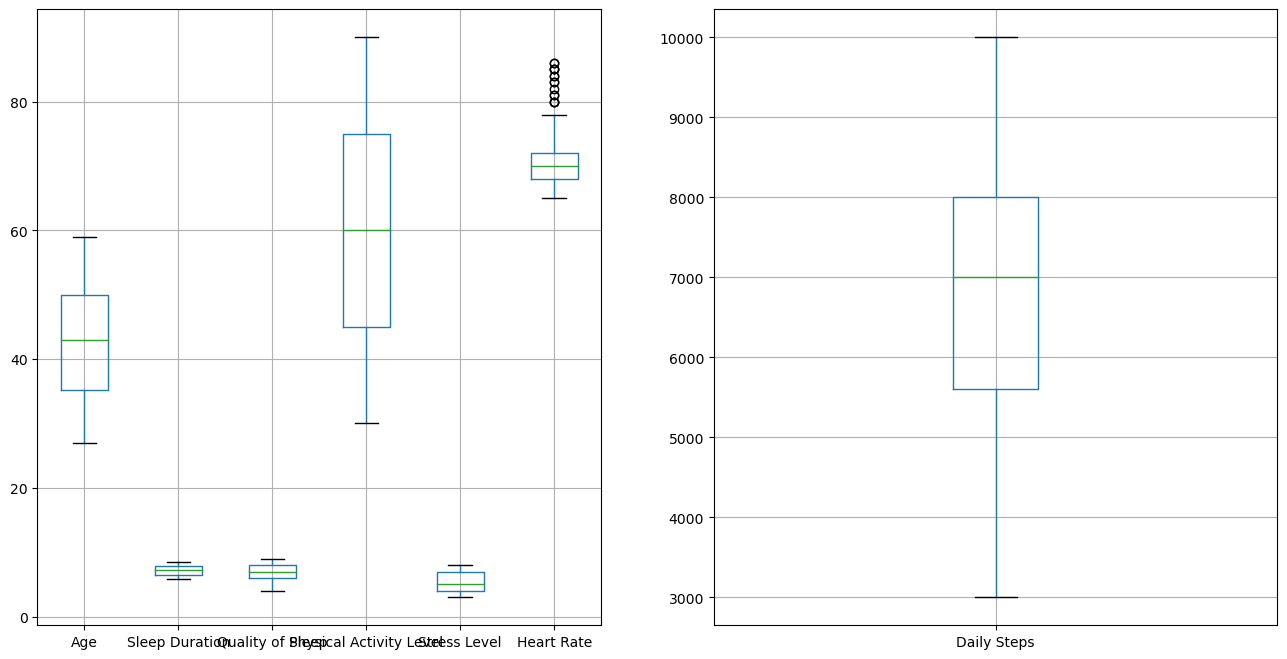

In [59]:
fig=plt.figure(figsize=(16,8))
fig.add_subplot(1,2,1)
data.boxplot([cols for cols in num_cols[:-1]])
fig.add_subplot(1,2,2)
data.boxplot('Daily Steps');

In [60]:
(data.iloc[:,:-1]).describe()

,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920
std,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679
min,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


In [61]:
data[data['Heart Rate']>80]['Heart Rate'].value_counts()


Heart Rate
85    3
81    2
84    2
83    2
86    2
82    1
Name: count, dtype: int64

Можно рассматривать эти значения как выбросы. Кроме того, следует отметить, что для такого признака, как Stress Level, смысл харатеристики std теряется. Мы этот признак не относим к категории вещественных

**Теперь поработаем с пространством признаков и дополним его, добавив новые.**

Названия новых сконструированных признаков выделены курсивом

In [62]:
data['BMI Category'].unique()

array(['Overweight', 'Normal', 'Obese', 'Normal Weight'], dtype=object)

*Индекс массы тела* 

In [63]:
def MassIndex(x):
    for index, val in zip((22, 27, 25, 30),['Normal', 'Overweight', 'Normal Weight', 'Obese'] ):
        if x == val:
            return index

In [64]:
data['MassIndex']=data['BMI Category'].apply(MassIndex)

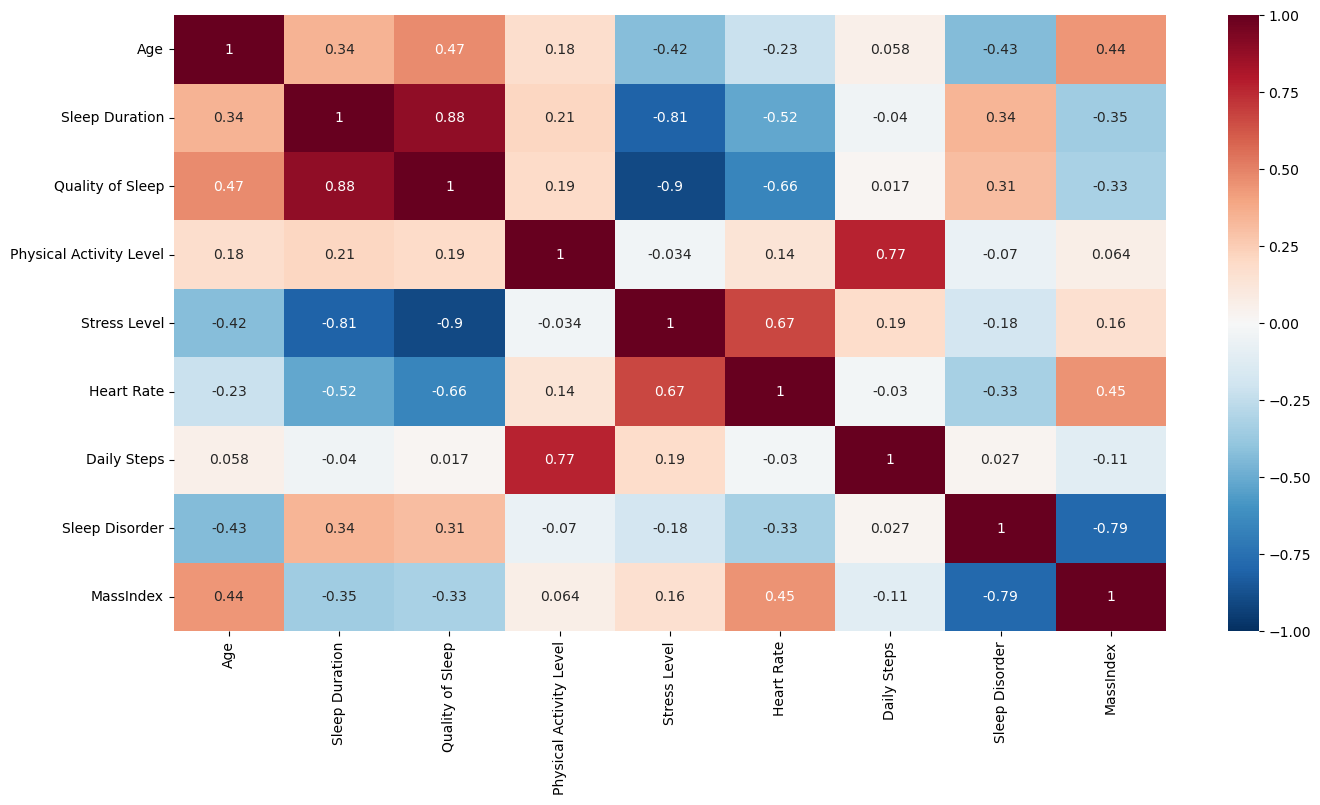

In [65]:
plt.figure(figsize=(16,8))
sns.heatmap(
    data.corr(numeric_only = True),        
    cmap='RdBu_r', 
    annot=True, 
    vmin=-1, vmax=1);

Добились неплохой коррелированности с целевой переменной

*Коэффициент физической активности*

In [66]:
data['ActivityIndex']=(1.5*(data['Physical Activity Level']/60)+1*data['Sleep Duration']+1.3*(24-data['Sleep Duration']-(data['Physical Activity Level']/60)))/24

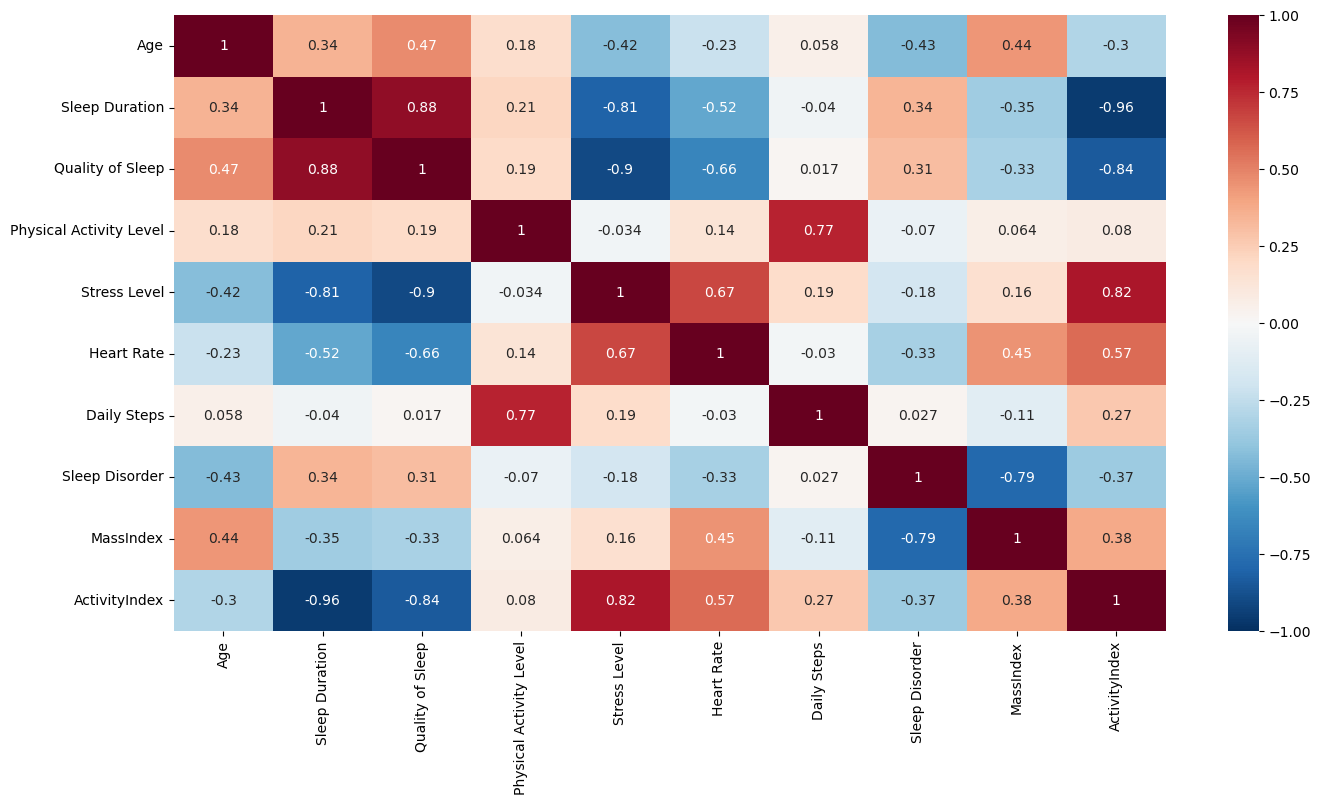

In [67]:
plt.figure(figsize=(16,8))
sns.heatmap(
    data.corr(numeric_only = True),        
    cmap='RdBu_r', 
    annot=True, 
    vmin=-1, vmax=1);

*Группа здоровья*

In [68]:
Sl_dur=[data['Quality of Sleep'].quantile(q=0.25*i) for i in range(1,4)]
St_level=[data['Stress Level'].quantile(q=0.25*i) for i in range(1,4)] 

In [69]:
Ind_act=[data['Physical Activity Level'].quantile(q=0.25*i) for i in range(1,4)]

In [70]:
def HelthLevel(x,a,b,c):
    x=np.array(x)
    if (x[0]<=a[0])&(x[1]<=b[0])&(x[2]>=c[2]):
        return 2
    elif (x[0]>=a[2])&(x[1]>=b[2])&(x[2]<=c[1]):
        return 0
    else:
        return 1

In [71]:
data['RiskGroup']=data.apply(lambda x: HelthLevel([x['Physical Activity Level'],x['Quality of Sleep'],x['Stress Level']],Ind_act,Sl_dur,St_level),axis=1)

In [72]:
y=data['Sleep Disorder']
X=data.drop(columns='Sleep Disorder')

In [73]:
numerical_cols = X.select_dtypes(include = [np.number])

In [74]:
numerical_cols=numerical_cols.drop(columns=['Quality of Sleep','Stress Level','RiskGroup'])
numerical_cols

,Age,Sleep Duration,Physical Activity Level,Heart Rate,Daily Steps,MassIndex,ActivityIndex
0,27,6.1,42,77,4200,27,1.229583
1,28,6.2,60,75,10000,22,1.230833
2,28,6.2,60,75,10000,22,1.230833
3,28,5.9,30,85,3000,30,1.230417
4,28,5.9,30,85,3000,30,1.230417
...,...,...,...,...,...,...,...
369,59,8.1,75,68,7000,27,1.209167
370,59,8.0,75,68,7000,27,1.210417
371,59,8.1,75,68,7000,27,1.209167
372,59,8.1,75,68,7000,27,1.209167


In [75]:
data1=X.select_dtypes(exclude = [np.number])
data2=X[['Quality of Sleep','Stress Level','RiskGroup']]
data1.index=data2.index
categorical_cols = pd.concat([data1,data2],axis=1)

In [76]:
categorical_cols

,Gender,Occupation,BMI Category,Blood Pressure,Quality of Sleep,Stress Level,RiskGroup
0,Male,Software Engineer,Overweight,126/83,6,6,1
1,Male,Doctor,Normal,125/80,6,8,1
2,Male,Doctor,Normal,125/80,6,8,1
3,Male,Sales Representative,Obese,140/90,4,8,2
4,Male,Sales Representative,Obese,140/90,4,8,2
...,...,...,...,...,...,...,...
369,Female,Nurse,Overweight,140/95,9,3,0
370,Female,Nurse,Overweight,140/95,9,3,0
371,Female,Nurse,Overweight,140/95,9,3,0
372,Female,Nurse,Overweight,140/95,9,3,0


Масштабируем вещественные признаки, применяя межквартильный размах. Использование данной стратегии продиктовано наличием выбросов. Также можно было бы их заменить на 75% квартиль. сравниваем результаты с Standard Scaler

In [77]:
from sklearn.preprocessing import RobustScaler,StandardScaler

In [78]:
rs1=RobustScaler()
res_test1=rs1.fit_transform(np.array(X['Heart Rate']).reshape(-1,1))

In [79]:
rs2=StandardScaler()
res_test2=rs2.fit_transform(np.array(X['Heart Rate']).reshape(-1,1))


C:\Users\Irina\AppData\Local\Temp\ipykernel_3772\2838377131.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X['Heart Rate'],kde=False, bins=6, color = 'blue',
C:\Users\Irina\AppData\Local\Temp\ipykernel_3772\2838377131.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(res_test1,kde=False, 

Text(0, 0.5, 'Standard Scaler')

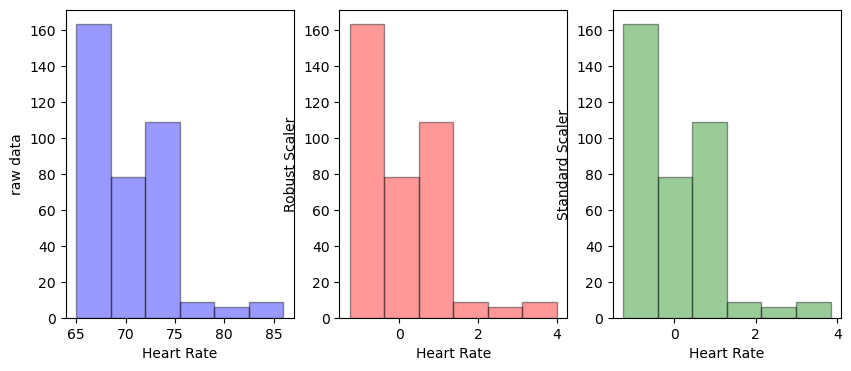

In [85]:
fig=plt.figure(figsize=(10,4))
ax=fig.add_subplot(1,3,1)
sns.distplot(X['Heart Rate'],kde=False, bins=6, color = 'blue',
             hist_kws={'edgecolor':'black'});
ax.set_xlabel('Heart Rate')
ax.set_ylabel('raw data')
ax=fig.add_subplot(1,3,2)
sns.distplot(res_test1,kde=False, bins=6, color = 'red',
             hist_kws={'edgecolor':'black'});
ax.set_xlabel('Heart Rate')
ax.set_ylabel('Robust Scaler')
ax=fig.add_subplot(1,3,3)
sns.distplot(res_test2,kde=False, bins=6, color = 'green',
             hist_kws={'edgecolor':'black'});
ax.set_xlabel('Heart Rate')
ax.set_ylabel('Standard Scaler')

Преимущество не найдено. Останавливаемся на Standard Scaler

In [86]:
rs=StandardScaler()
res=rs.fit_transform(X[numerical_cols.columns])
res_standard_num = pd.DataFrame(res, columns=numerical_cols.columns)
res_standard_num.head()

,Age,Sleep Duration,Physical Activity Level,Heart Rate,Daily Steps,MassIndex,ActivityIndex
0,-1.753096,-1.298887,-0.825418,1.654719,-1.619584,1.032302,1.080007
1,-1.637643,-1.173036,0.039844,1.170474,1.970077,-0.923529,1.208381
2,-1.637643,-1.173036,0.039844,1.170474,1.970077,-0.923529,1.208381
3,-1.637643,-1.550588,-1.402260,3.591698,-2.362273,2.205800,1.165589
4,-1.637643,-1.550588,-1.402260,3.591698,-2.362273,2.205800,1.165589


Кодируем категориальные признаки

In [88]:
res_enc_cat=pd.get_dummies(X[categorical_cols.columns], columns= categorical_cols.columns, drop_first= True,dtype=int )
res_enc_cat.head(10) 

,Gender_Male,Occupation_Doctor,Occupation_Engineer,Occupation_Lawyer,Occupation_Manager,Occupation_Nurse,Occupation_Sales Representative,Occupation_Salesperson,Occupation_Scientist,Occupation_Software Engineer,...,Quality of Sleep_7,Quality of Sleep_8,Quality of Sleep_9,Stress Level_4,Stress Level_5,Stress Level_6,Stress Level_7,Stress Level_8,RiskGroup_1,RiskGroup_2
0,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,1,0
1,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
2,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
3,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,1
4,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,1
5,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,1
6,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
7,1,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,1,0
8,1,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,1,0
9,1,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,1,0


In [89]:
res_standard_num.index=res_enc_cat.index
X_prep=pd.concat([res_standard_num,res_enc_cat],axis=1)
X_prep.head(10)

,Age,Sleep Duration,Physical Activity Level,Heart Rate,Daily Steps,MassIndex,ActivityIndex,Gender_Male,Occupation_Doctor,Occupation_Engineer,...,Quality of Sleep_7,Quality of Sleep_8,Quality of Sleep_9,Stress Level_4,Stress Level_5,Stress Level_6,Stress Level_7,Stress Level_8,RiskGroup_1,RiskGroup_2
0,-1.753096,-1.298887,-0.825418,1.654719,-1.619584,1.032302,1.080007,1,0,0,...,0,0,0,0,0,1,0,0,1,0
1,-1.637643,-1.173036,0.039844,1.170474,1.970077,-0.923529,1.208381,1,1,0,...,0,0,0,0,0,0,0,1,1,0
2,-1.637643,-1.173036,0.039844,1.170474,1.970077,-0.923529,1.208381,1,1,0,...,0,0,0,0,0,0,0,1,1,0
3,-1.637643,-1.550588,-1.402260,3.591698,-2.362273,2.205800,1.165589,1,0,0,...,0,0,0,0,0,0,0,1,0,1
4,-1.637643,-1.550588,-1.402260,3.591698,-2.362273,2.205800,1.165589,1,0,0,...,0,0,0,0,0,0,0,1,0,1
5,-1.637643,-1.550588,-1.402260,3.591698,-2.362273,2.205800,1.165589,1,0,0,...,0,0,0,0,0,0,0,1,0,1
6,-1.522190,-1.047186,-0.921559,2.865331,-2.052819,2.205800,0.794730,1,0,0,...,0,0,0,0,0,0,1,0,0,1
7,-1.522190,0.840575,0.760896,-0.040138,0.732263,-0.923529,-0.631650,1,1,0,...,1,0,0,0,0,1,0,0,1,0
8,-1.522190,0.840575,0.760896,-0.040138,0.732263,-0.923529,-0.631650,1,1,0,...,1,0,0,0,0,1,0,0,1,0
9,-1.522190,0.840575,0.760896,-0.040138,0.732263,-0.923529,-0.631650,1,1,0,...,1,0,0,0,0,1,0,0,1,0


In [90]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

In [91]:
from sklearn.model_selection import train_test_split


Xtrain, Xtest, ytrain, ytest = train_test_split(X_prep, y, test_size=0.3, shuffle=True,random_state=42)

Выберем оптимальное значение гиперпараметров, организовав поиск по сетке. Варьировался только один параметр. Однако, эту процедуру можно применять и для большего количества. Расматриваются следующие модели: KNeighborsClassifier,SGDClassifier, LogisticRegression, SVC,  DecisionTreeClassifier

In [92]:
np.random.seed(42)

In [93]:
import warnings
warnings.filterwarnings("ignore")

In [94]:
n_range=range(1,50)
loss_range=['hinge','log_loss', 'modified_huber', 'squared_hinge', 'perceptron', 'squared_error', 'huber','epsilon_insensitive']
C_range=[1/pow(10,i) for i in range(5,-1,-1)]
depth=[i for i in range(1,15)]
pivot_var=[]
k=1
for param,est in zip(({'n_neighbors':n_range},{'loss':loss_range},{'C':C_range},{'C':C_range},{'max_depth':depth}),(KNeighborsClassifier(),SGDClassifier(),LogisticRegression(),SVC(),DecisionTreeClassifier())):
    grid=GridSearchCV(estimator=est,param_grid=[param],cv=5,scoring='roc_auc')
    results=grid.fit(Xtrain[numerical_cols.columns],ytrain)
    pivot_var.append([f'model{k}',results.best_score_,results.best_params_])
    k+=1

In [95]:
pivot_var

[['model1', 0.9167360311059907, {'n_neighbors': 3}],
 ['model2', 0.8923821524577573, {'loss': 'hinge'}],
 ['model3', 0.9259795026881721, {'C': 0.01}],
 ['model4', 0.9194784466205836, {'C': 1.0}],
 ['model5', 0.9012027169738864, {'max_depth': 2}]]

Теперь с помощью кросс валидации посмотрим какого качества удалось добиться на обучающей выборкe

In [96]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score,accuracy_score,recall_score,roc_auc_score,precision_score

model=[KNeighborsClassifier(n_neighbors=3),SGDClassifier(loss='hinge'),LogisticRegression(C=0.01),SVC(C=1,probability=True),DecisionTreeClassifier(max_depth=2),]
k=1
cvs_array=np.zeros((5,4))
score_list=[]
for est in model[1:]:
    answ=est
    answ.fit(Xtrain,ytrain)
    cv_scores = cross_val_score(answ,Xtrain,ytrain,cv=5,scoring="roc_auc",error_score="raise")
    score_list.append([f1_score(ytest, answ.predict(Xtest)),
                       accuracy_score(ytest, answ.predict(Xtest)),
                       recall_score(ytest, answ.predict(Xtest)),
                       precision_score(ytest, answ.predict(Xtest))])
    
    print(f'model{k} roc_auc {np.mean(cv_scores)}')
    cvs_array[:,k-1]=cv_scores
    k+=1
res_df=pd.DataFrame(data=score_list,columns=['f1','accuracy','recall','precision'])

model1 roc_auc 0.8963899289554533
model2 roc_auc 0.9253737039170506
model3 roc_auc 0.926932843701997
model4 roc_auc 0.8935253456221197


Выведем значение метрик на тестовой выборке

In [97]:
res_df

,f1,accuracy,recall,precision
0,0.909091,0.902655,0.887097,0.932203
1,0.936508,0.929204,0.951613,0.921875
2,0.960630,0.955752,0.983871,0.938462
3,0.944882,0.938053,0.967742,0.923077


Все модели хорошо отработали

In [98]:
cvs_array

array([[0.95610119, 0.91741071, 0.9516369 , 0.83630952],
       [0.75703125, 0.89609375, 0.87734375, 0.8625    ],
       [0.96774194, 0.98617512, 0.96927803, 0.96774194],
       [0.90706605, 0.90399386, 0.93010753, 0.87403994],
       [0.89400922, 0.92319508, 0.906298  , 0.92703533]])

Данные достаточно однородно представлены. Больших расхождений в зависимости от того, какой фолд отбрасывается в качестве тестового, практически не наблюдается.

**Ансаблевые модели**

На основе двух лучших рассмотренных выше моделей построим ансамблевую модель с использованием голосовании. Также используем bagging, где в качетве бэйзлайн модели выступает решающее дерево с подобранными выше параметрами. И дополним случайным лесов с параметрами по умолчанию

In [99]:
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier,VotingClassifier
import pickle
vote=VotingClassifier(estimators=[('lr',model[2]),('svc',model[3])],voting='soft',n_jobs=-1)
bagging = BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=2), n_estimators = 50)
rf=RandomForestClassifier(n_estimators = 50) #воспользуемся значениями параметров по умолчанию
z=k
cvs_res=[]
score_list=[]
for est in [vote,bagging,rf]:
    answ=est
    answ.fit(Xtrain,ytrain)
    cv_scores = cross_val_score(answ,Xtrain,ytrain,cv=5,scoring="roc_auc",error_score="raise")
    score_list.append([f1_score(ytest, answ.predict(Xtest)),
                       accuracy_score(ytest, answ.predict(Xtest)),
                       recall_score(ytest, answ.predict(Xtest)),
                       precision_score(ytest, answ.predict(Xtest))])
    print(f'ensemble model{z} roc_auc {np.mean(cv_scores)}')
    filename = f'finalized_model{z}.sav'
    pickle.dump(answ, open(filename, 'wb'))
    cvs_res.append(np.mean(cv_scores))
    z+=1
res_df1=pd.DataFrame(data=score_list,columns=['f1','accuracy','recall','precision'])

ensemble model5 roc_auc 0.9395547715053765
ensemble model6 roc_auc 0.8996570180491552
ensemble model7 roc_auc 0.9105592357910905


Видно, что использование голосование позволило повысить метрику на обучающей выборке. В данном лучае она оказалась самой максимальной. Однако, нельзя забывать, что производился поиск по сетке для подбора параметров, т.е. для получения результата требовалось значительно больше времени в сравнении с применением RandomForestClassifier без настройки. 

In [100]:
res_df1

,f1,accuracy,recall,precision
0,0.960630,0.955752,0.983871,0.938462
1,0.944882,0.938053,0.967742,0.923077
2,0.960630,0.955752,0.983871,0.938462


In [101]:
Xtrain[numerical_cols.columns].shape

(261, 7)

Посмотрим на важность признаков. Оказывается, введенные нами ранее дополнительные признаки имеют больший вес

<Axes: >

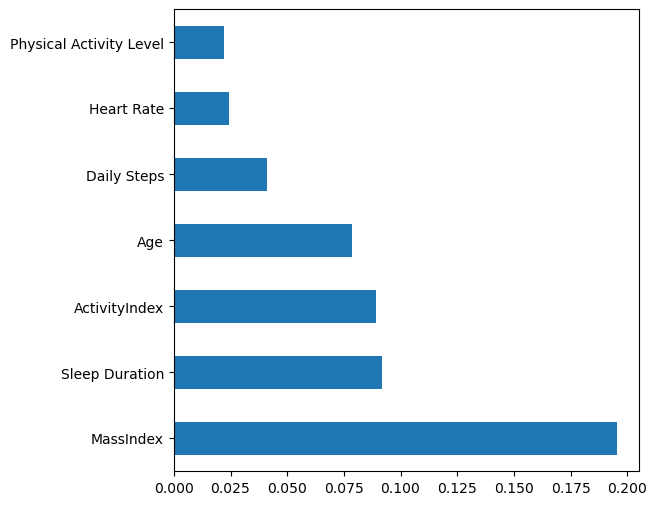

In [105]:
plt.figure(figsize=(6, 6))
feat_importances = pd.Series(rf.feature_importances_, index=Xtrain.columns)
#most_important_features = feat_importances.nlargest(10).index.tolist()
feat_importances[numerical_cols.columns].nlargest(7).plot(kind='barh')

**Многоклассовая классификация**

Используя встроенные классификаторы, решим задачу многоклассовой классификации

In [139]:
from sklearn.model_selection import cross_val_predict

In [140]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X_prep, target_original, test_size=0.3, shuffle=True,random_state=42)

In [141]:
svm_clf=SVC()
svm_clf.fit(Xtrain,ytrain)
ytrain_pred=cross_val_predict(svm_clf,Xtrain,ytrain,cv=5)

Построим и визуализируем матрицу ошибок

In [143]:
from sklearn.metrics import confusion_matrix
conf_mx=confusion_matrix(ytrain,ytrain_pred)
conf_mx

array([[148,   5,   4],
       [  3,  44,   4],
       [  5,   3,  45]], dtype=int64)

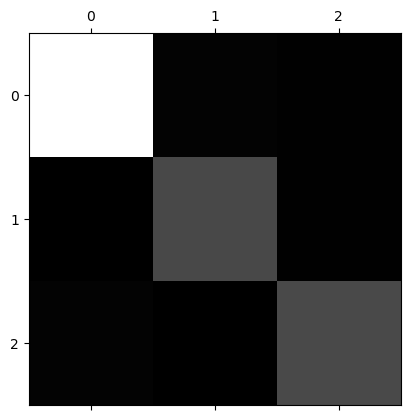

In [144]:
plt.matshow(conf_mx,cmap=plt.cm.gray)
plt.show()

Как видим, получили хороший результат

In [146]:
from sklearn.multiclass import OneVsOneClassifier 

In [154]:
ovo=OneVsOneClassifier(SVC())
ovo.fit(Xtrain,ytrain)
ypred=ovo.predict(Xtest)
ypred

array([0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 1, 0, 2, 0, 0, 0, 0,
       0, 2, 2, 0, 2, 2, 2, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 2, 1, 2, 2,
       0, 0, 0, 0, 1, 0, 1, 2, 1, 0, 2, 1, 2, 1, 1, 0, 0, 2, 0, 0, 2, 0,
       2, 0, 0, 0, 0, 2, 0, 1, 1, 2, 0, 0, 1, 2, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 2, 2, 0, 0, 2, 0, 0, 0, 1, 2, 0, 1, 2, 1, 0, 0,
       1, 0, 2], dtype=int64)

In [155]:
conf_mx=confusion_matrix(ytest,ypred)
conf_mx

array([[61,  0,  1],
       [ 2, 20,  5],
       [ 2,  2, 20]], dtype=int64)